In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('D:\machine-learning\homework\KNN_Project_Data.txt')

In [5]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


Because our algorithm is based on distance and not scaling the features can lead to wrong distance calculation, we have to scale the data as well.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [11]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [12]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762
...,...,...,...,...,...,...,...,...,...,...
995,0.776682,0.758234,-1.753322,0.507699,0.174588,-1.279354,-1.797957,0.431419,0.088717,1.188886
996,-0.313446,0.385206,0.885502,-0.083136,-1.208486,0.309242,0.746346,-0.112571,-1.763636,-1.559081
997,-0.358895,-0.979015,0.837715,0.014018,-1.397424,0.054473,0.164120,-1.514726,-0.275122,0.864287
998,0.275080,-0.992399,0.030371,1.062954,1.142871,-0.192872,2.051386,-0.036233,0.436685,-0.212456


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df['TARGET CLASS'], test_size=0.30, random_state=101)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
pred = knn.predict(X_test)

In [19]:
type(y_test)

pandas.core.series.Series

In [20]:
df=pd.DataFrame({'Label': y_test,'Predicrions':pred})

In [21]:
df

,Label,Predicrions
545,1,1
298,1,0
109,0,0
837,1,1
194,0,1
...,...,...
847,1,1
682,1,0
884,0,0
325,0,0


In [22]:
print(knn.score(X_test,y_test))

0.72


In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[109  43]
 [ 41 107]]


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [25]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

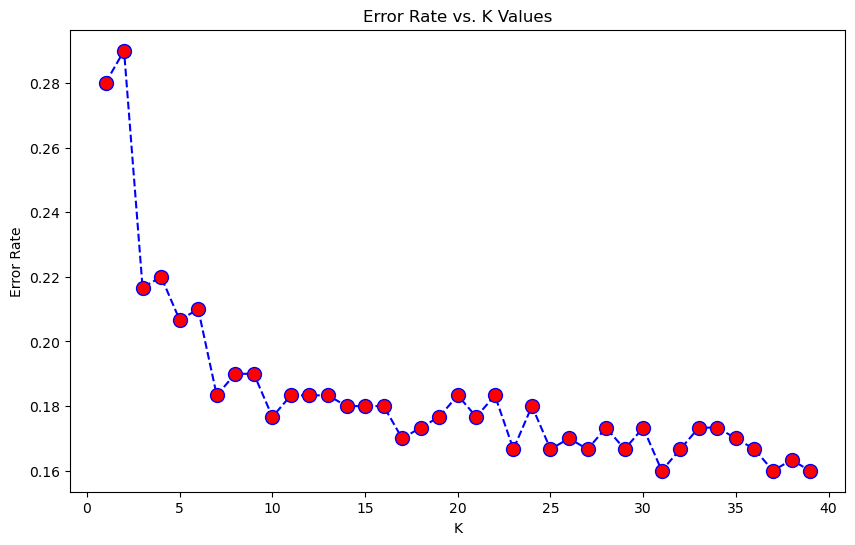

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',ls='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Values')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [28]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train,y_train)

pred = knn.predict(X_test)

In [29]:
print(knn.score(X_test,y_test))

0.84


In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[123  29]
 [ 19 129]]


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

